# Task 2

## Name: Ofir Tzafrir
## I.D: 206666950

<div>
<img src="https://t4.ftcdn.net/jpg/00/77/03/15/360_F_77031521_p6l9ZisQRCROrpqkNSyGmxXvvxzjMfb1.jpg" width="500"/>
</div>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import re

In [3]:
data = pd.read_csv('matala2_cosmetics_2019-Nov.csv', low_memory=False)
data.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02,view,5802432,1487580009286590000,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09,cart,5844397,1487580006317030000,NaN,NaN,2.38 sale,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10,view,5837166,1783999064103190000,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11,cart,5876812,1487580010100290000,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24,remove_from_cart,5826182,1487580007483040000,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
5,2019-11-01 00:00:24,remove_from_cart,5826182,1487580007483040000,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
6,2019-11-01 00:00:25,view,5856189,1487580009026550000,NaN,runail,15.71,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
7,2019-11-01 00:00:32,view,5837835,1933472286753420000,NaN,NaN,3.49,514649199,432a4e95-375c-4b40-bd36-0fc039e77580
8,2019-11-01 00:00:34,remove_from_cart,5870838,1487580007675980000,NaN,milv,0.79,429913900,2f0bff3c-252f-4fe6-afcd-5d8a6a92839a
9,2019-11-01 00:00:37,view,5870803,1487580007675980000,NaN,milv,0.79,429913900,2f0bff3c-252f-4fe6-afcd-5d8a6a92839a


---
# Q1
---

In [4]:
data1 = data

# Convert the timestamp column to a datetime object
data1['event_time'] = pd.to_datetime(data1['event_time'])

# Sort the dataframe by user_id, user_session, and timestamp
data1 = data1.sort_values(['user_id', 'user_session', 'event_time'])

# Add a new column called duration_to_next_event
data1['duration_to_next_event'] = data1.groupby(['user_id', 'user_session'])['event_time'].diff().dt.seconds

# For the last event in each visit, set the duration_to_next_event to 0
data1.loc[data1.groupby(['user_id', 'user_session'])['event_time'].tail(1).index, 'duration_to_next_event'] = 0

# Print the updated dataframe
data1.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event
437209,2019-11-04 15:28:57,view,5240,1487580009202710000,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0.0
697519,2019-11-06 10:40:34,cart,5614842,1487580005411060000,NaN,cnd,13.56,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,NaN
697645,2019-11-06 10:41:26,cart,5766379,1783999067156640000,NaN,kaaral,12.25,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,52.0
698043,2019-11-06 10:43:30,purchase,5766379,1783999067156640000,NaN,kaaral,12.25,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,124.0
698045,2019-11-06 10:43:30,purchase,5614842,1487580005411060000,NaN,cnd,13.56,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,0.0


---
# Q2
---

In [5]:
data2 = data.groupby(['user_id']).agg(
{
    'event_time': lambda x: list(x),

}).reset_index()
    
data2.columns = ['user_id',"event_time"]

df = data2

# convert event_time to datetime format
df['event_time'] = pd.to_datetime(df['event_time'].apply(lambda x: x[0]))

# sort the dataframe by user_id and event_time in ascending order
df = df.sort_values(['user_id', 'event_time'])

# group the dataframe by user_id
grouped = df.groupby('user_id')

# calculate the time difference between consecutive visits for each user
timediffs = grouped['event_time'].diff().fillna(pd.Timedelta(seconds=0))

# assign a panel number to each visit based on whether the time difference is greater than 5 days
panels = (timediffs > pd.Timedelta(days=5)).cumsum()

# add the panel number as the funnel_number column to the dataframe
df['funnel_number'] = panels + 1

df

,user_id,event_time,funnel_number
0,1120748,2019-11-04 15:28:57,1
1,10079204,2019-11-06 10:40:34,1
2,10521214,2019-11-03 18:53:34,1
3,11274156,2019-11-04 18:22:21,1
4,13117447,2019-11-01 11:16:58,1
...,...,...,...
101057,568926337,2019-11-08 11:16:28,1
101058,568926338,2019-11-08 11:16:23,1
101059,568926409,2019-11-08 11:16:55,1
101060,568926576,2019-11-08 11:16:53,1


---
# Q3
---

In [6]:
data3 = df

# convert the "event_time" column to datetime type
data3['event_time'] = pd.to_datetime(data3['event_time'])

# sort the data frame by "user_id" and "event_time" in ascending order
data3 = data3.sort_values(by=['user_id', 'event_time'])

# create a new column named "index_in_funnel"
data3['index_in_funnel'] = (data3.groupby(['user_id'])
                         .cumcount() + 1)

# display the resulting data frame
data3.head()

,user_id,event_time,funnel_number,index_in_funnel
0,1120748,2019-11-04 15:28:57,1,1
1,10079204,2019-11-06 10:40:34,1,1
2,10521214,2019-11-03 18:53:34,1,1
3,11274156,2019-11-04 18:22:21,1,1
4,13117447,2019-11-01 11:16:58,1,1


---
# Q4
---

In [7]:
data4 = data

# Define a regular expression to extract the price
regex = r'^\d+\.\d+'

# Define a function to extract the price and convert it to float
def extract_price(price_string):
    match = re.search(regex, price_string)
    if match:
        return float(match.group())
    else:
        return None

# Apply the function to the "Price" column
data4['price'] = data4['price'].apply(extract_price)

# Print the resulting dataframe
data4.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02,view,5802432,1487580009286590000,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09,cart,5844397,1487580006317030000,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10,view,5837166,1783999064103190000,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11,cart,5876812,1487580010100290000,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24,remove_from_cart,5826182,1487580007483040000,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb


---
# Q5
---

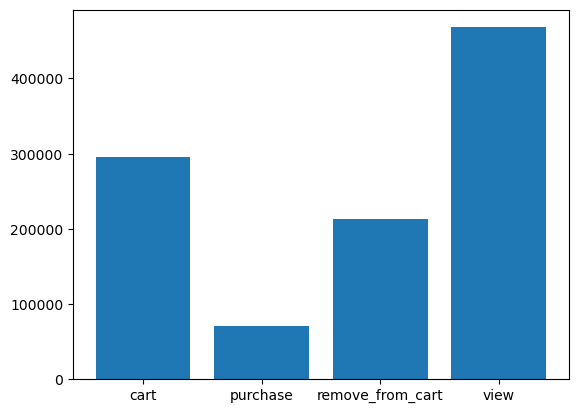

In [8]:
data5 = data
data5 = data5[['user_id','event_type']].groupby(['event_type']).count()
plot5 = pd.DataFrame([['cart',295915],['purchase',71193],['remove_from_cart',213312],['view',468155]],
                     columns=['event_type','user_id']) 

x = plot5['event_type']
y = plot5['user_id']

plt.bar(x,y)
plt.show()

---
# Q6
---

Counting the number of events for each user

Counting the total time is the site for each user

Making a list of products viewed by a user during a visit

The list of products added to the cart

The list of products purchased during the visit

The last step - making a new dataframe with all the columns

In [9]:
count_the_num = data
count_the_num = count_the_num.rename(columns={'product_id': 'NumOfEvents'})
count_the_num = count_the_num[['NumOfEvents','user_id','user_session']].groupby(['user_id','user_session']).count().reset_index()
count_the_num = count_the_num['NumOfEvents']

count_the_time = data
count_the_time = count_the_time.rename(columns={'product_id': 'TotalTime'})
count_the_time = count_the_time[['TotalTime','user_id','user_session']].groupby(['user_id','user_session']).sum().reset_index()
count_the_time = count_the_time['TotalTime']

list_of_viewed = data
list_of_viewed = list_of_viewed.groupby(['user_id']).agg(
{
    'event_type': lambda x: list(x),

}).reset_index()
    
list_of_viewed.columns = ['user_id','list_of_viewed']

list_of_added_to_cart = data
list_of_added_to_cart = list_of_added_to_cart.loc[(list_of_added_to_cart['event_type'] == 'cart')]
list_of_added_to_cart = list_of_added_to_cart['brand']

purchased_of_list = data
purchased_of_list = purchased_of_list.loc[(purchased_of_list['event_type'] == 'purchase')]
purchased_of_list = purchased_of_list['brand']

data6 = data
data6 = data6.drop(columns=['product_id','category_id','category_code','price','event_time','event_type','brand']).copy()
data6[['funnel_number','index_in_funnel']] = data3[['funnel_number','index_in_funnel']]
data6['NumOfEvents'] = count_the_num
data6['TotalTime'] = count_the_time
data6['list_of_viewed'] = list_of_viewed['list_of_viewed']
data6['list_of_added_to_cart'] = list_of_added_to_cart
data6['purchased_of_list'] = purchased_of_list
data6.head()

,user_id,user_session,funnel_number,index_in_funnel,NumOfEvents,TotalTime,list_of_viewed,list_of_added_to_cart,purchased_of_list
0,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,1.0,1.0,1.0,5240.0,[view],NaN,NaN
1,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,1.0,1.0,4.0,22762442.0,"[cart, cart, purchase, purchase]",NaN,NaN
2,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f,1.0,1.0,3.0,17139883.0,"[view, view, view]",NaN,NaN
3,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7,1.0,1.0,2.0,11709744.0,"[cart, view, view]",jessnail,NaN
4,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,1.0,1.0,1.0,5649179.0,"[view, cart, cart, cart, cart, cart, view]",NaN,NaN
